# 1- Inspection of simulated data (Graphene)

In this notebook we look at the the pyprismatic 4DSTEM simulated outputs, calculating the sampling factor in each case and plotting averaged diffraction patterns. 

[Loading the data](#load)</br>
[Checking different convergence angles](#conv)</br>
[Single data inspection](#single)

In [2]:
# %matplotlib qt 
%matplotlib inline

In [3]:
import hyperspy.api as hs
hs.set_log_level('ERROR')
import numpy as np
import os
import h5py
import sys
import matplotlib.pyplot as plt

In [4]:
sys.path.append('/dls/science/groups/e02/Mohsen/code/Git_Repos/Merlin-Medipix/')
import epsic_tools.api as epsic

<a id='load'></a>
# Loading the data

In [5]:
sim_root_path = '/dls/e02/data/2020/cm26481-1/processing/pty_simulated_data_MD/sim_matrix_ptyREX_4June2020_512pixArray/'
sim_paths = []
sim_names = []
for dirname, dirnames, filenames in os.walk(sim_root_path):
    for filename in filenames:
        if filename.endswith('.h5'):
            sim_paths.append(os.path.join(dirname, filename))
            sim_names.append(filename)

<a id='conv'></a>
# Checking different convergence angles

In [6]:
sim_names.sort()
sim_paths.sort()

In [7]:
for i, file in enumerate(sim_names):
    print('[',i,']', file)

[ 0 ] Graphene_defect_10.0mrad_261.59A_def_14.15A_step_size.h5
[ 1 ] Graphene_defect_10.0mrad_261.59A_def_18.50A_step_size.h5
[ 2 ] Graphene_defect_10.0mrad_261.59A_def_2.18A_step_size.h5
[ 3 ] Graphene_defect_10.0mrad_261.59A_def_20.68A_step_size.h5
[ 4 ] Graphene_defect_10.0mrad_261.59A_def_21.77A_step_size.h5
[ 5 ] Graphene_defect_10.0mrad_261.59A_def_4.35A_step_size.h5
[ 6 ] Graphene_defect_10.0mrad_261.59A_def_6.53A_step_size.h5
[ 7 ] Graphene_defect_10.0mrad_261.59A_def_8.71A_step_size.h5
[ 8 ] Graphene_defect_12.0mrad_244.14A_def_14.10A_step_size.h5
[ 9 ] Graphene_defect_12.0mrad_244.14A_def_18.43A_step_size.h5
[ 10 ] Graphene_defect_12.0mrad_244.14A_def_2.17A_step_size.h5
[ 11 ] Graphene_defect_12.0mrad_244.14A_def_20.60A_step_size.h5
[ 12 ] Graphene_defect_12.0mrad_244.14A_def_21.69A_step_size.h5
[ 13 ] Graphene_defect_12.0mrad_244.14A_def_4.34A_step_size.h5
[ 14 ] Graphene_defect_12.0mrad_244.14A_def_6.51A_step_size.h5
[ 15 ] Graphene_defect_12.0mrad_244.14A_def_8.67A_step_si

In [8]:
def_8mrad = []
def_10mrad = []
def_12mrad = []
def_15mrad = []
def_20mrad = []
def_25mrad = []
def_32mrad = []
def_42mrad = []
for sim in sim_paths:
    if '8.0mrad' in sim:
        def_8mrad.append(sim)
    if '10.0mrad' in sim:
        def_10mrad.append(sim)
    if '12.0mrad' in sim:
        def_12mrad.append(sim)
    if '15.0mrad' in sim:
        def_15mrad.append(sim)
    if '20.0mrad' in sim:
        def_20mrad.append(sim)
    if '25.0mrad' in sim:
        def_25mrad.append(sim)
    if '32.0mrad' in sim:
        def_32mrad.append(sim)
    if '42.0mrad' in sim:
        def_42mrad.append(sim)

In [9]:
sum_dp = []
scan_sizes = [] 
conv_array = [def_8mrad[0], def_10mrad[0], def_12mrad[0], def_15mrad[0], def_20mrad[0], def_25mrad[0], def_32mrad[0], def_42mrad[0]]
for data in conv_array:
    d = epsic.sim_utils.sim_to_hs(data)
    d_sum = d.sum()
    sum_dp.append(d_sum.data)
sum_dp = hs.signals.Signal2D(sum_dp)

Dataset shape is (2, 2, 512, 512)
Dataset shape is (2, 2, 512, 512)
Dataset shape is (2, 2, 512, 512)
Dataset shape is (2, 2, 512, 512)
Dataset shape is (2, 2, 512, 512)
Dataset shape is (2, 2, 512, 512)
Dataset shape is (2, 2, 512, 512)
Dataset shape is (2, 2, 512, 512)


In [10]:
sum_dp.axes_manager

<Axes manager, axes: (8|512, 512)>
            Name |   size |  index |  offset |   scale |  units 
================ | ====== | ====== | ======= | ======= | ====== 
     <undefined> |      8 |      0 |       0 |       1 | <undefined> 
---------------- | ------ | ------ | ------- | ------- | ------ 
     <undefined> |    512 |        |       0 |       1 | <undefined> 
     <undefined> |    512 |        |       0 |       1 | <undefined>

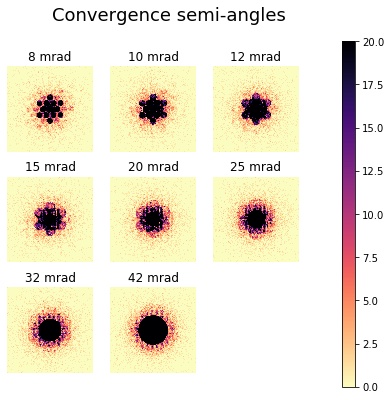

In [11]:
labels = ['8 mrad', '10 mrad', '12 mrad', '15 mrad', '20 mrad', '25 mrad', '32 mrad', '42 mrad']
hs.plot.plot_images(sum_dp, axes_decor='off', per_row=3, cmap = 'magma_r', vmax = 20,
                   label=labels, suptitle = 'Convergence semi-angles', colorbar = 'single')

In [12]:
pixel_size = 8.5048828125e-12
detector_pix_array = 512
image_size = [detector_pix_array, detector_pix_array]
l = epsic.ptycho_utils.e_lambda(80000)
detector_pixel_size = 55e-6 

In [13]:
sampling_factors = []
for i, file in enumerate(sim_names):
    conv_semi = float(sim_names[i].split('_')[-6][:-4])*1e-3
    defocus = float(sim_names[i].split('_')[-5][:-1])*1e-10
    step_size = float(sim_names[i].split('_')[-3][:-1])*1e-10

    rad, probe = epsic.sim_utils.calc_probe_size(pixel_size, image_size, l, defocus, conv_semi, plot_probe=False, return_probeArr=True)
    n_pix = probe.shape[0]
    d = epsic.sim_utils.sim_to_hs(sim_paths[i])
    scan_size = list(d.data.shape[:2])
    n = scan_size[0]
    print('(',pixel_size * n_pix, 2*rad, n, step_size, ')')
#         print(2*rad)
#         print(n)
#         print(step_size)
    s_factor = epsic.ptycho_utils.get_sampling_factor(pixel_size * n_pix, 2*rad, n, step_size)

    print('[',i,']', file, ' ', s_factor)
    sampling_factors.append(s_factor)


Dataset shape is (2, 2, 512, 512)
( 4.3545e-09 2.1767920653614104e-09 2 1.4150000000000002e-09 )
[ 0 ] Graphene_defect_10.0mrad_261.59A_def_14.15A_step_size.h5   1.2123474635388853
Dataset shape is (2, 2, 512, 512)
( 4.3545e-09 2.1767920653614104e-09 2 1.85e-09 )
[ 1 ] Graphene_defect_10.0mrad_261.59A_def_18.50A_step_size.h5   1.0813818864543674
Dataset shape is (13, 13, 512, 512)
( 4.3545e-09 2.1767920653614104e-09 13 2.1800000000000002e-10 )
[ 2 ] Graphene_defect_10.0mrad_261.59A_def_2.18A_step_size.h5   5.905586892567529
Dataset shape is (2, 2, 512, 512)
( 4.3545e-09 2.1767920653614104e-09 2 2.068e-09 )
[ 3 ] Graphene_defect_10.0mrad_261.59A_def_20.68A_step_size.h5   1.0258453024198368
Dataset shape is (2, 2, 512, 512)
( 4.3545e-09 2.1767920653614104e-09 2 2.1770000000000002e-09 )
[ 4 ] Graphene_defect_10.0mrad_261.59A_def_21.77A_step_size.h5   1.0001626018486784
Dataset shape is (7, 7, 512, 512)
( 4.3545e-09 2.1767920653614104e-09 7 4.35e-10 )
[ 5 ] Graphene_defect_10.0mrad_261.59A

Text(0, 0.5, 'sampling factor')

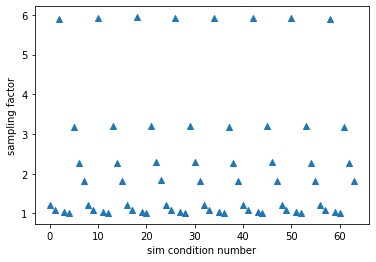

In [15]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(np.arange(len(sampling_factors)),sampling_factors, marker='^')
plt.xlabel('sim condition number')
plt.ylabel('sampling factor')


<a id='single'></a>
# Single data inspection

In [16]:
f = sim_paths[10]
print(f)

/dls/e02/data/2020/cm26481-1/processing/pty_simulated_data_MD/sim_matrix_ptyREX_4June2020_512pixArray/Graphene_defect_12.0mrad_244.14A_def_2.17A_step_size/Graphene_defect_12.0mrad_244.14A_def_2.17A_step_size.h5


In [17]:
sim_names[10]

'Graphene_defect_12.0mrad_244.14A_def_2.17A_step_size.h5'

In [18]:
d = epsic.sim_utils.sim_to_hs(f)

Dataset shape is (13, 13, 512, 512)


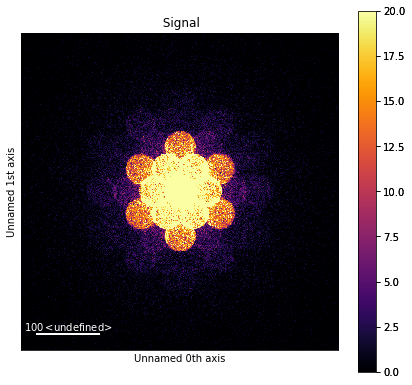

In [19]:
d.sum().plot(cmap='inferno', vmax = 20)

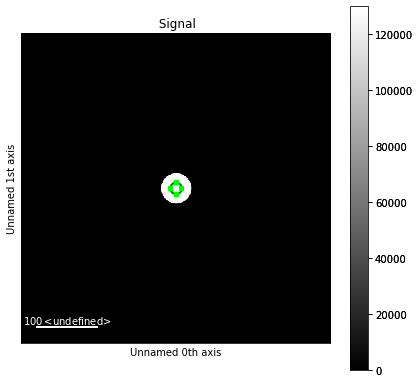

In [20]:
bf_ = epsic.sim_utils.get_bf_disc(d)

Resize the circle ROI to match the direct beam size in the above plot.

In [41]:
bf_

CircleROI(cx=256, cy=256, r=25.5, r_inner=0)

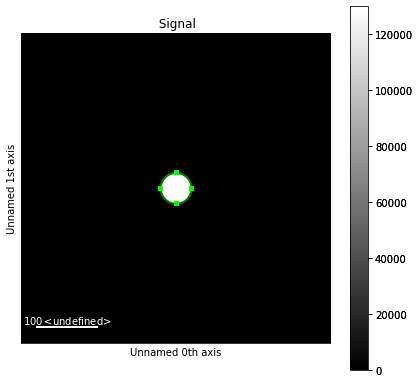

In [21]:
l = epsic.sim_utils.calc_camera_length(d, 25.5, 0.012, detector_pixel_size)

In [22]:
l

0.116875

In notebook 1 we calculated camera length 0.1147 m